In [34]:
import pandas as pd
import os
import numpy as np
from queryhandler.database_connector import DatabaseConnector

In [35]:
# connect to database in order to fetch top 200 coins data
db_connector = DatabaseConnector(
    db_name=os.environ.get("DATABASE_NAME"),
    db_user=os.environ.get("DATABASE_USER"),
    db_password=os.environ.get("DATABASE_PASSWORD"),
    db_host=os.environ.get("DATABASE_HOST"),
    db_port=os.environ.get("DATABASE_PORT"),
)
engine, connection = db_connector.connect_to_db()


Text(0.5, 1.0, 'Market-cap and Volume Relation')

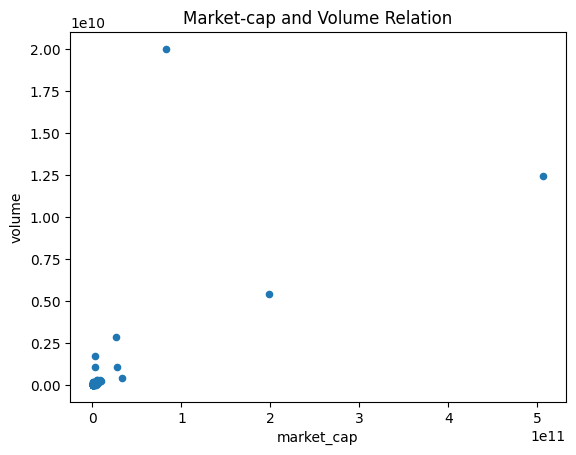

In [37]:
# define the query to fetch data from coin table
query = "SELECT * FROM coin_history where time_open='2023-08-25'"
df = pd.read_sql(query, engine)

# df['market_cap'] = [float(item) for item in df["market_cap"]]
# df['volume'] = [float(item) for item in df["volume"]]
# plot figure
ax = df.plot.scatter(x="market_cap", y="volume")
ax.set_title("Market-cap and Volume Relation")
